# Faridan Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataslayer/train.csv')

In [ ]:
df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


In [ ]:
  numeric_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.describe()

,Id,Engine Size(L),Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,54937.000000,49673.000000,50414.000000,0.0,0.0,0.0,54937.000000
mean,27469.000000,2.978387,5.292379,NaN,NaN,NaN,246.688680
std,15859.090206,1.303561,1.600217,NaN,NaN,NaN,67.571095
min,1.000000,1.000000,3.000000,NaN,NaN,NaN,96.000000
25%,13735.000000,2.000000,4.000000,NaN,NaN,NaN,197.000000
50%,27469.000000,2.500000,4.000000,NaN,NaN,NaN,233.000000
75%,41203.000000,3.600000,6.000000,NaN,NaN,NaN,290.000000
max,54937.000000,8.400000,12.000000,NaN,NaN,NaN,522.000000


In [ ]:
df['Fuel Consumption City'].value_counts()

Series([], Name: Fuel Consumption City, dtype: int64)

In [ ]:
df['Fuel Consumption Hwy'].value_counts()

Series([], Name: Fuel Consumption Hwy, dtype: int64)

In [ ]:
df['Fuel Consumption Comb'].value_counts()

Series([], Name: Fuel Consumption Comb, dtype: int64)

In [ ]:
df.drop(['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb'], axis=1, inplace=True)

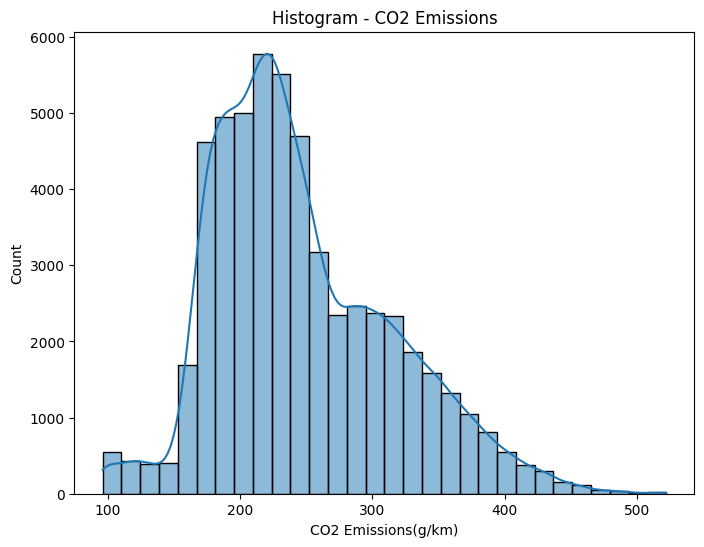

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True)
plt.title('Histogram - CO2 Emissions')
plt.xlabel('CO2 Emissions(g/km)')
plt.show()

In [ ]:
df.shape

(54937, 8)

In [ ]:
# Menghapus outliers pada Engine Size dan Cylinders
df = df[(df['Engine Size(L)'] > 0) & (df['Cylinders'] > 0)]

# Identifikasi batas atas (misalnya: Q3 + 1.5*IQR) dan batas bawah untuk CO2 Emissions
Q1 = df['CO2 Emissions(g/km)'].quantile(0.25)
Q3 = df['CO2 Emissions(g/km)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers pada CO2 Emissions
df = df[(df['CO2 Emissions(g/km)'] >= lower_bound) & (df['CO2 Emissions(g/km)'] <= upper_bound)]


In [ ]:
df.shape

(45143, 8)

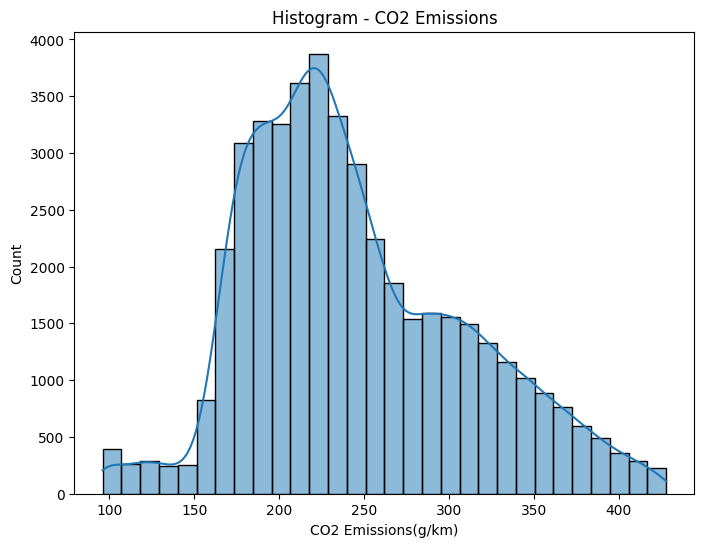

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True)
plt.title('Histogram - CO2 Emissions')
plt.xlabel('CO2 Emissions(g/km)')
plt.show()

In [ ]:
df['Id'].value_counts()

1        1
36447    1
36577    1
36578    1
36579    1
        ..
18292    1
18293    1
18294    1
18295    1
54937    1
Name: Id, Length: 45143, dtype: int64

In [ ]:
df.shape

(45143, 8)

In [ ]:
df.describe()

,Id,Engine Size(L),Cylinders,CO2 Emissions(g/km)
count,45143.000000,45143.000000,45143.000000,45143.000000
mean,27444.555125,2.953432,5.264293,244.683428
std,15847.070066,1.284287,1.576261,64.716816
min,1.000000,1.000000,3.000000,96.000000
25%,13720.500000,2.000000,4.000000,197.000000
50%,27462.000000,2.500000,4.000000,232.000000
75%,41147.500000,3.600000,6.000000,288.000000
max,54937.000000,8.400000,12.000000,428.000000


In [ ]:
df['Cylinders'].value_counts()

4.0     23846
6.0     13618
8.0      6744
3.0       318
12.0      219
10.0      206
5.0       192
Name: Cylinders, dtype: int64

In [ ]:
df.select_dtypes(exclude='object').nunique()

Id                     45143
Engine Size(L)            42
Cylinders                  7
CO2 Emissions(g/km)      333
dtype: int64

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

FOLD            13.080655
CHEVO           11.906608
BMV             10.929712
TOYOTI           6.740801
NIRRAN           5.462641
JIPU             5.199034
DOGE             5.094921
KIO              4.775934
GONDA            4.631947
RYUNDAI          4.448087
FOLKSWA          4.104734
MATSUDA          3.836697
LECUS            3.663912
CADILUXE         3.344926
BARUSU           2.780054
TOLVO            2.554106
MITSU            2.011386
LAND CRAWLER     1.668033
ASURA            1.550628
FIAR             1.455375
LAMBOGI          0.759808
Name: Make, dtype: float64


SUV - SMALL                 20.411130
COMPACT                     16.906008
MID-SIZE                    15.467722
SUV - STANDARD               8.484320
FULL-SIZE                    7.455375
PICKUP TRUCK - STANDARD      6.914061
SUBCOMPACT                   6.634456
STATION WAGON - SMALL        4.339462
TWO-SEATER                   2.894466
PICKUP TRUCK - SMALL         2.431441
MINIVAN                      1.306312
MINICOM

In [ ]:
df['Transmission'].replace(['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', '-9999', 'zero', 'unestablished'], np.nan, inplace=True)

In [ ]:
df['Fuel Type'].replace(['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', 'unestablished'], np.nan, inplace=True)

In [ ]:
df['Vehicle Class'].replace(['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', '-9999', 'zero', 'unestablished'], np.nan, inplace=True)


In [ ]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Vehicle Class    3.672773
Fuel Type        3.475622
Transmission     2.724675
dtype: float64

In [ ]:
df.isnull().sum()

Id                        0
Make                      0
Vehicle Class          1658
Engine Size(L)            0
Cylinders                 0
Transmission           1230
Fuel Type              1569
CO2 Emissions(g/km)       0
dtype: int64

In [ ]:
df.describe(include='object')

,Make,Vehicle Class,Transmission,Fuel Type
count,45143,43485,43913,43574
unique,21,16,25,5
top,FOLD,SUV - SMALL,AS6,X
freq,5905,9125,9983,27952


In [ ]:
# Imputasi missing value pada kolom 'Transmission' dengan mode
mode_transmission = df['Transmission'].mode()[0]
df['Transmission'].fillna(mode_transmission, inplace=True)

# Imputasi missing value pada kolom 'Fuel Type' dengan mode
mode_fuel_type = df['Fuel Type'].mode()[0]
df['Fuel Type'].fillna(mode_fuel_type, inplace=True)

# Imputasi missing value pada kolom 'Vehicle Class' dengan mode
vehicle_class_type = df['Vehicle Class'].mode()[0]
df['Vehicle Class'].fillna(vehicle_class_type, inplace=True)

In [ ]:
df.isnull().sum()

Id                     0
Make                   0
Vehicle Class          0
Engine Size(L)         0
Cylinders              0
Transmission           0
Fuel Type              0
CO2 Emissions(g/km)    0
dtype: int64

In [ ]:
df.shape

(45143, 8)

In [ ]:
categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df.shape

(45143, 71)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_components = 10
pca = PCA(n_components=num_components)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import lightgbm as lgb

# from sklearn.metrics import mean_squared_error


# # Inisialisasi model-model yang akan di-tune
# models = {
#     'DecisionTree': DecisionTreeRegressor(),
#     'RandomForest': RandomForestRegressor(),
#     'GradientBoosting': GradientBoostingRegressor(),
#     'LightBGM': lgb.LGBMRegressor()
# }

# # # Grid parameter untuk masing-masing model
# # params = {
# #     'DecisionTree': {'max_depth': [None, 10, 20, 30]},
# #     'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
# #     'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]},
# #     'LightBGM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [6, 8, 10],'num_leaves': [20, 30, 40]},
# # }


# # Proses hyperparameter tuning
# for model_name, model in models.items():
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Calculate RMSE
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)

#     print(f"Model: {model_name}, RMSE: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier, CatBoostRegressor

model = CatBoostRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



# Menghitung RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Model: CatBoost, RMSE: {rmse}")

Learning rate set to 0.072159
0:	learn: 61.4161583	total: 52ms	remaining: 52s
1:	learn: 58.2518310	total: 56.8ms	remaining: 28.3s
2:	learn: 55.3064510	total: 62.1ms	remaining: 20.6s
3:	learn: 52.6697271	total: 67.1ms	remaining: 16.7s
4:	learn: 50.3651292	total: 79.4ms	remaining: 15.8s
5:	learn: 48.1856405	total: 89.9ms	remaining: 14.9s
6:	learn: 46.1836231	total: 97.4ms	remaining: 13.8s
7:	learn: 44.4484444	total: 104ms	remaining: 12.8s
8:	learn: 42.8487275	total: 111ms	remaining: 12.2s
9:	learn: 41.3710117	total: 117ms	remaining: 11.6s
10:	learn: 40.0223086	total: 123ms	remaining: 11.1s
11:	learn: 38.8019233	total: 129ms	remaining: 10.7s
12:	learn: 37.7270141	total: 136ms	remaining: 10.3s
13:	learn: 36.6872886	total: 141ms	remaining: 9.95s
14:	learn: 35.7505811	total: 148ms	remaining: 9.7s
15:	learn: 34.9633043	total: 152ms	remaining: 9.37s
16:	learn: 34.2021976	total: 158ms	remaining: 9.12s
17:	learn: 33.5754673	total: 164ms	remaining: 8.96s
18:	learn: 32.9494042	total: 168ms	remaini

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error
import numpy as np

# Inisialisasi model neural network
def create_neural_network(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    optimizer = SGD(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Fungsi untuk mengatur learning rate secara dinamis
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 30
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

# Buat objek model dan learning rate scheduler
neural_network = create_neural_network(learning_rate=0.01)
lr_callback = LearningRateScheduler(lr_scheduler)

# Training model pada data training hasil PCA
history = neural_network.fit(X_train_pca, y_train, epochs=100, batch_size=32, callbacks=[lr_callback], validation_split=0.2, verbose=0)

# Melakukan prediksi pada data testing hasil PCA
y_pred = neural_network.predict(X_test_pca)

# Menghitung RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model: Neural Network, RMSE: {rmse}")

283/283 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
testing = pd.read_csv('/content/drive/MyDrive/dataslayer/test.csv')
testing.sample()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
17035,71973,NIRRAN,TWO-SEATER,3.7,6.0,M6,Z,NaN,7.70 L/100km,NaN


In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     23545 non-null  int64 
 1   Make                   23545 non-null  object
 2   Vehicle Class          23326 non-null  object
 3   Engine Size(L)         22913 non-null  object
 4   Cylinders              23039 non-null  object
 5   Transmission           23382 non-null  object
 6   Fuel Type              23324 non-null  object
 7   Fuel Consumption City  22861 non-null  object
 8   Fuel Consumption Hwy   22824 non-null  object
 9   Fuel Consumption Comb  22857 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class NumericConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in self.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        return X

class ColumnRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(columns=self.columns, axis=1)
        return X

class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in self.columns:
            mode_value = X[col].mode()[0]
            X[col].fillna(mode_value, inplace=True)
        return X

class ValueRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns, values):
        self.columns = columns
        self.values = values

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col, val in zip(self.columns, self.values):
            X[col].replace(val, np.nan, inplace=True)
        return X

values_to_remove = [
    ['Transmission', ['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', '-9999', 'zero', 'unestablished']],
    ['Fuel Type', ['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', 'unestablished']],
    ['Vehicle Class', ['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', '-9999', 'zero', 'unestablished']]
]

# Define lower_bound and upper_bound
lower_bound = 0
upper_bound = 500

pipeline = Pipeline([
    ('value_remover', ValueRemover(columns=[val[0] for val in values_to_remove], values=[val[1] for val in values_to_remove])),
    ('numeric_converter', NumericConverter(columns=['Engine Size(L)', 'Cylinders'])),
    ('column_remover', ColumnRemover(columns=['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb'])),
    ('missing_value_imputer', MissingValueImputer(columns=['Transmission', 'Fuel Type', 'Vehicle Class', 'Make'])),
])

processed_testing_data = pipeline.transform(testing)


In [ ]:
processed_testing_data

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X
1,54939,BMV,COMPACT,2.0,4.0,A8,Z
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X
3,54941,LECUS,SUV - SMALL,NaN,4.0,AS6,Z
4,54942,BARUSU,COMPACT,2.0,NaN,M6,Z
...,...,...,...,...,...,...,...
23540,78478,MITSU,SUV - SMALL,2.0,4.0,M5,X
23541,78479,CHEVO,COMPACT,1.4,4.0,M6,X
23542,78480,KIO,SUV - SMALL,NaN,4.0,AS6,X
23543,78481,JIPU,SUV - SMALL,2.4,4.0,A9,X


In [ ]:
processed_testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23545 non-null  int64  
 1   Make            23545 non-null  object 
 2   Vehicle Class   23545 non-null  object 
 3   Engine Size(L)  21276 non-null  float64
 4   Cylinders       21651 non-null  float64
 5   Transmission    23545 non-null  object 
 6   Fuel Type       23545 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
check_missing_testing = processed_testing_data.isnull().sum() * 100 / processed_testing_data.shape[0]
check_missing_testing[check_missing_testing > 0].sort_values(ascending=False)

Engine Size(L)    9.636866
Cylinders         8.044171
dtype: float64

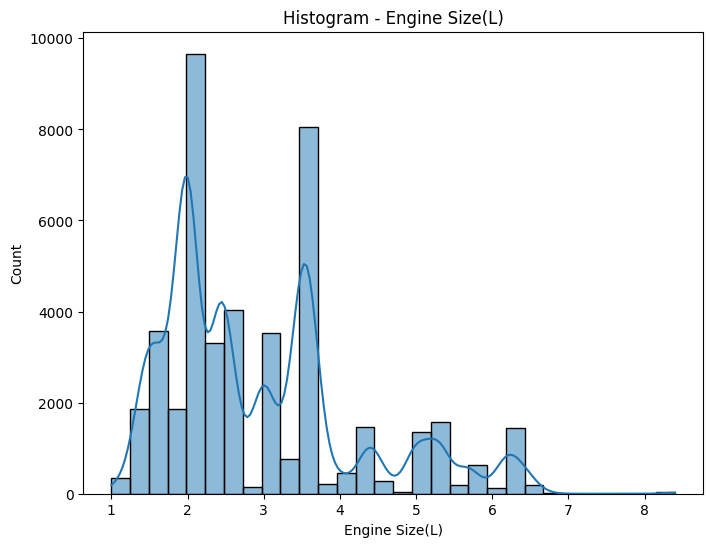

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Engine Size(L)'], bins=30, kde=True)
plt.title('Histogram - Engine Size(L)')
plt.xlabel('Engine Size(L)')
plt.show()

In [ ]:
processed_testing_data.describe()

,Id,Engine Size(L),Cylinders
count,23545.00000,21276.000000,21651.000000
mean,66710.00000,2.976358,5.291118
std,6797.00038,1.306311,1.594883
min,54938.00000,1.000000,3.000000
25%,60824.00000,2.000000,4.000000
50%,66710.00000,2.500000,4.000000
75%,72596.00000,3.600000,6.000000
max,78482.00000,8.400000,12.000000


In [ ]:
# processed_testing_data = processed_testing_data[(processed_testing_data['Engine Size(L)'] != -1) & (processed_testing_data['Cylinders'] != -1)]

In [ ]:
# processed_testing_data['Engine Size(L)'] = processed_testing_data['Engine Size(L)'].replace(-1, np.nan)
# processed_testing_data['Cylinders'] = processed_testing_data['Cylinders'].replace(-1, np.nan)

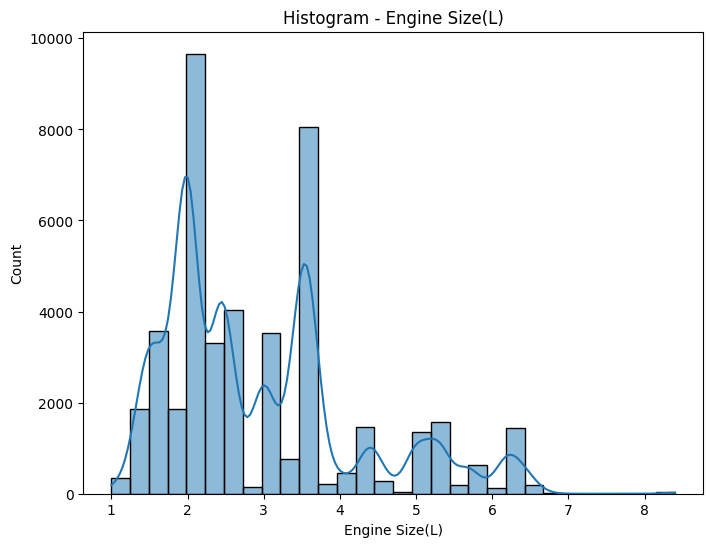

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Engine Size(L)'], bins=30, kde=True)
plt.title('Histogram - Engine Size(L)')
plt.xlabel('Engine Size(L)')
plt.show()

In [ ]:
processed_testing_data.describe()

,Id,Engine Size(L),Cylinders
count,23545.00000,21276.000000,21651.000000
mean,66710.00000,2.976358,5.291118
std,6797.00038,1.306311,1.594883
min,54938.00000,1.000000,3.000000
25%,60824.00000,2.000000,4.000000
50%,66710.00000,2.500000,4.000000
75%,72596.00000,3.600000,6.000000
max,78482.00000,8.400000,12.000000


In [ ]:
# Imputasi missing value dengan nilai mean
mean_engine_size = processed_testing_data['Engine Size(L)'].mean()
mean_cylinders = processed_testing_data['Cylinders'].mean()

processed_testing_data['Engine Size(L)'].fillna(mean_engine_size, inplace=True)
processed_testing_data['Cylinders'].fillna(mean_cylinders, inplace=True)

In [ ]:
check_missing_testing = processed_testing_data.isnull().sum() * 100 / processed_testing_data.shape[0]
check_missing_testing[check_missing_testing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
for col in processed_testing_data.select_dtypes(include='object').columns.tolist():
    print(processed_testing_data[col].value_counts(normalize=True)*100)
    print('\n')

FOLD            13.085581
CHEVO           12.023784
BMV             10.605224
TOYOTI           6.774262
NIRRAN           5.398174
DOGE             5.151837
JIPU             4.952219
GONDA            4.790826
KIO              4.735613
RYUNDAI          4.251433
FOLKSWA          4.149501
LECUS            3.839456
CADILUXE         3.559142
MATSUDA          3.533659
BARUSU           2.909323
TOLVO            2.599278
MITSU            1.851773
LAND CRAWLER     1.783818
ASURA            1.618178
FIAR             1.533234
LAMBOGI          0.853684
Name: Make, dtype: float64


SUV - SMALL                 23.308558
COMPACT                     16.364409
MID-SIZE                    15.323848
SUV - STANDARD               8.570822
FULL-SIZE                    7.644935
PICKUP TRUCK - STANDARD      6.990869
SUBCOMPACT                   6.532172
STATION WAGON - SMALL        4.663410
TWO-SEATER                   3.015502
PICKUP TRUCK - SMALL         2.318964
MINIVAN                      1.299639
MINICOM

In [ ]:
categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

processed_testing_data = pd.get_dummies(processed_testing_data, columns=categorical_columns)

In [ ]:
predictions = model.predict(processed_testing_data)

# Menambahkan kolom ID dari processed_testing_data
result_df = pd.DataFrame({'Id': processed_testing_data['Id'], 'CO2 Emissions(g/km)': predictions})

# Menyimpan ke CSV
result_df.to_csv('/content/drive/MyDrive/dataslayer/abin(catboost)_prep(faridan).csv', index=False)


# Gading notebook


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


from catboost import CatBoostClassifier, CatBoostRegressor
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataslayer/train.csv')
df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0


In [ ]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, bad_categoric):
        self.bad_categoric = bad_categoric
        self.robust_scl = RobustScaler()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        for col in X_transformed:
            X_transformed[col].replace(self.bad_categoric, np.nan, inplace=True)

        X_transformed['Cylinders'] = pd.to_numeric(X_transformed['Cylinders'], errors='coerce')
        X_transformed['Engine Size(L)'] = pd.to_numeric(X_transformed['Engine Size(L)'], errors='coerce')

        X_transformed['Engine Size(L)'] = X_transformed.groupby(['Cylinders'])['Engine Size(L)'].transform(lambda x: x.fillna(x.mean().round()))

        cylinders_nan_rows = X_transformed[X_transformed['Cylinders'].isna()]
        X_transformed.set_index('Id', inplace=True)
        cylinders_nan_rows.set_index('Id', inplace=True)
        X_transformed.update(cylinders_nan_rows)
        X_transformed.reset_index(inplace=True)

        mean_engine_size = X_transformed['Engine Size(L)'].mean().round()
        X_transformed['Engine Size(L)'].fillna(mean_engine_size, inplace=True)

        X_transformed['Cylinders'] = X_transformed.groupby(['Engine Size(L)'])['Cylinders'].transform(lambda x: x.fillna(x.mean().round()))

        mean_value = X_transformed['Transmission'].mean().round().iloc[0] if not X_transformed['Transmission'].mean().round().empty else pd.NA
        X_transformed['Transmission'].fillna(mean_value, inplace=True)

        mean_value = X_transformed['Fuel Type'].mean().round().iloc[0] if not X_transformed['Fuel Type'].mean().round().empty else pd.NA
        X_transformed['Fuel Type'].fillna(mean_value, inplace=True)

        mean_value = X_transformed['Vehicle Class'].mean().round().iloc[0] if not X_transformed['Vehicle Class'].mean().round().empty else pd.NA
        X_transformed['Vehicle Class'].fillna(mean_value, inplace=True)

        X_transformed.rename(columns={'Fuel Consumption City': 'City',
                                      'Fuel Consumption Hwy': 'Hwy',
                                      'Fuel Consumption Comb': 'Comb'},
                             inplace=True)

        fuel = ['City', 'Hwy', 'Comb']

        for col in fuel:
            X_transformed[col] = X_transformed[col].astype(str)
            X_transformed[col + '_Value'], X_transformed[col + '_satuan'] = X_transformed[col].str.extract(r'([\d.]+)\s*(.+)').values.T
            X_transformed[col + '_Value'] = pd.to_numeric(X_transformed[col + '_Value'], errors='coerce')

        for index, row in X_transformed.iterrows():
            for col in fuel:
                value = row[col + '_Value']
                satuan = row[col + '_satuan']
                if satuan in ['L/100km', 'L/100 km', 'liters per 100 km']:
                    X_transformed.at[index, col + ' Convert'] = 100 / value if value != 0 else 0
                elif satuan in ['L/10km']:
                    X_transformed.at[index, col + ' Convert'] = 10 / value if value != 0 else 0
                elif satuan in ['mpg Imp.']:
                    X_transformed.at[index, col + ' Convert'] = 1.60934 / (0.425144 * value) if value != 0 else 0
                elif satuan in ['MPG (AS)']:
                    X_transformed.at[index, col + ' Convert'] = 1.60934 / (0.425144 * value) if value != 0 else 0
                elif satuan in ['km per L', 'km/L']:
                    X_transformed.at[index, col + ' Convert'] = value

        columns_to_drop = ['City', 'City_Value', 'City_satuan', 'Hwy', 'Hwy_Value', 'Hwy_satuan', 'Comb', 'Comb_Value', 'Comb_satuan']
        X_transformed.drop(columns=columns_to_drop, inplace=True)

        X_transformed['City Convert'].fillna(X_transformed['City Convert'].median(), inplace=True)
        X_transformed['Hwy Convert'].fillna(X_transformed['Hwy Convert'].median(), inplace=True)
        X_transformed['Comb Convert'].fillna(X_transformed['Comb Convert'].median(), inplace=True)

        df_num = X_transformed[['Engine Size(L)', 'Cylinders', 'City Convert', 'Hwy Convert', 'Comb Convert']]
        self.robust_scl.fit(df_num)
        df_num_scaled = self.robust_scl.transform(df_num)
        df_num_scaled = pd.DataFrame(data=df_num_scaled, columns=df_num.columns, index=df_num.index)

        df_cat = X_transformed.select_dtypes(include=['object']).astype('category')
        df_one_hot = df_cat.select_dtypes(include=['category'])
        df_one_hot = pd.get_dummies(df_one_hot)

        X_processed = pd.concat([df_num_scaled, df_one_hot], axis=1)
        return X_processed

In [ ]:
bad_categoric = ['not-recorded', 'missing', 'na', 'unspecified', 'unknown', '-1', 'not-available', '-9999', 'zero', 'unestablished']
preprocessor = Preprocessor(bad_categoric)

In [ ]:
training_pipeline = Pipeline([
    ('preprocessor', preprocessor)
    # ('lgbm_model', lgb.LGBMRegressor())
])

In [ ]:
cols = ['CO2 Emissions(g/km)']
X = df.drop(columns=cols)
y = df['CO2 Emissions(g/km)']

In [ ]:
X_processed = training_pipeline.fit_transform(X)

# X_processed.head()

TypeError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_processed = training_pipeline.fit_transform(X_train)

In [ ]:
X_test_processed = training_pipeline.transform(X_test)

In [ ]:
X_train_processed.head()

,Engine Size(L),Cylinders,City Convert,Hwy Convert,Comb Convert,Make_ASURA,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.133333,2.0,-0.344164,-0.617973,-0.442689,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.0,0.576497,-0.294260,-0.069814,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,-0.066667,0.0,0.218876,-0.238348,-0.893629,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.333333,0.0,-0.054270,-0.014502,0.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.000000,0.0,-0.640292,-0.623230,-0.037817,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# X_train_processed = X_train_processed.drop(columns=['Id'])
# X_test_processed = X_test_processed.drop(columns=['Id'])

In [ ]:
model = CatBoostRegressor()

In [ ]:
print(X_train_processed.shape, y_train.shape)

(109712, 72) (109712,)


In [ ]:
model.fit(X_train_processed, y_train)

predictions = model.predict(X_test_processed)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

Learning rate set to 0.086008
0:	learn: 74.3869680	total: 76.3ms	remaining: 1m 16s
1:	learn: 72.2475135	total: 118ms	remaining: 58.7s
2:	learn: 70.4212266	total: 141ms	remaining: 46.9s
3:	learn: 68.7859473	total: 171ms	remaining: 42.7s
4:	learn: 67.3847698	total: 201ms	remaining: 39.9s
5:	learn: 66.1272528	total: 230ms	remaining: 38.1s
6:	learn: 65.0648263	total: 260ms	remaining: 36.9s
7:	learn: 64.0783681	total: 292ms	remaining: 36.2s
8:	learn: 63.1931046	total: 323ms	remaining: 35.5s
9:	learn: 62.4149441	total: 349ms	remaining: 34.5s
10:	learn: 61.6644657	total: 379ms	remaining: 34.1s
11:	learn: 61.0473821	total: 414ms	remaining: 34.1s
12:	learn: 60.5185597	total: 445ms	remaining: 33.8s
13:	learn: 60.0465543	total: 475ms	remaining: 33.5s
14:	learn: 59.6535425	total: 507ms	remaining: 33.3s
15:	learn: 59.2054821	total: 537ms	remaining: 33s
16:	learn: 58.8375930	total: 567ms	remaining: 32.8s
17:	learn: 58.4527715	total: 586ms	remaining: 32s
18:	learn: 58.1540659	total: 601ms	remaining: 

## Predict data testing

In [ ]:
testing = pd.read_csv("/content/test.csv")
testing.sample()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
39533,176675,FOLD,VAN - PASSENGER,3.5,6.0,AS10,X,6.95 km per L,5.89 liters per 100 km,1.06 L/10km


In [ ]:
test_processed = preprocessor.fit_transform(testing)

In [ ]:
test_processed

,Engine Size(L),Cylinders,City Convert,Hwy Convert,Comb Convert,Make_ASURA,Make_BARUSU,Make_BMV,Make_CADILUXE,Make_CHEVO,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.000000,0.0,0.065485,3.968954,-0.883657,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.866667,1.0,-0.120328,-0.068969,-0.175542,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.0,-0.605590,-0.624512,-0.865195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.0,0.015468,-0.123095,-0.101802,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.333333,2.0,-0.574786,-0.614834,-0.485892,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58771,0.000000,0.0,-0.622166,-0.245783,-0.228438,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58772,-0.533333,0.0,-0.638519,-0.627094,1.162006,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58773,0.000000,0.0,0.121355,-0.621321,-0.876177,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
58774,1.733333,2.0,-0.634506,-0.629725,-0.891738,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_pred_testing = model.predict(test_processed)

output = pd.DataFrame({'Id': testing['Id'], 'CO2 Emissions(g/km)': y_pred_testing})

ValueError: ignored

In [ ]:
output.head()

,Id,CO2 Emissions(g/km)
0,137142,256.232361
1,137143,386.213884
2,137144,215.721201
3,137145,266.561566
4,137146,358.962393


In [ ]:
output.to_csv('faridan_submission(10-12-2023).csv', index=False)